# NYC new measles cases by month (2018 - 2019)

* This Jupyter/Python notebook creates a bar chart of the number of new measles cases by month during the 2018-2019 measles outbreak in NYC.
* This notebook is part of the [Visualizing the 2019 Measles Outbreak](https://carlos-afonso.github.io/measles/) open-source GitHub project.
* [Carlos Afonso](https://www.linkedin.com/in/carlos-afonso-w/), Jan 4, 2020.

## Import libraries

In [1]:
from datetime import datetime
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os
import pandas as pd

## Read and show the data

The data was manually collected from the source ([NYC Health Measles webpage](https://www1.nyc.gov/site/doh/health/health-topics/measles.page)) and saved as a [CSV file](https://github.com/carlos-afonso/measles/blob/master/data/nyc-health/2018-2019-outbreak/nyc-new-measles-cases-by-month.csv). We use this manual approach because the data is small.

In [2]:
# Set (relative) path to the CSV data file
data_file = os.path.join('..', 'data', 'nyc-health', '2018-2019-outbreak', 'nyc-new-measles-cases-by-month.csv')

# Import data from the CSV file as a pandas dataframe
df = pd.read_csv(data_file)

# Show the data
df

,Start Date,End Date,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Total
0,2018-09-01,2019-08-19,1,13,28,14,37,71,169,193,97,20,6,0,649


## Extract Data

Extract and transform the data necessary to create the bar chart.

### Extract the Start and End Dates

We want to show the start and end dates in the plot, to provide context. So, we need to extract these two dates from the dataframe (first two columns) and transform them into nicelly formatted strings.

In [3]:
# Notes about the lambda function below:
# 1) strptime transforms the raw date string to a datetime object
# 2) strftime transforms the datetime object to a nicelly formatted date string
[start_month, end_month] = map(
    lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%b %Y'),
    df.iloc[0, :2]
)

# Show the nicelly formated date strings
[start_month, end_month]

['Sep 2018', 'Aug 2019']

### Extract the Total Cases

We also want to show the total number of cases in the plot, to provide context.

In [4]:
# Get the number of total cases (last row, last column)
total_cases = df.iloc[0, -1]

# Check if there is a data problem where the reported total
# does not match with the sum of the new cases per month
if total_cases != df.iloc[0, 2:-1].sum():
    print('WARNING: cases for each month do NOT add up to the reported total!')

# Show the total cases
total_cases

649

### Extract Data to Plot

Extract the data to actually plot (third to penultimate columns).

In [5]:
# Extract the data to plot (third to penultimate columns)
data_to_plot = df.iloc[0, 2:-1]

# Show the data to plot
data_to_plot

Sep 2018      1
Oct 2018     13
Nov 2018     28
Dec 2018     14
Jan 2019     37
Feb 2019     71
Mar 2019    169
Apr 2019    193
May 2019     97
Jun 2019     20
Jul 2019      6
Aug 2019      0
Name: 0, dtype: object

### Create Month Labels

Create nicely formatted month labels to be used in the bar chart.

In [6]:
# Get the 'raw' month labels
month_labels = list(data_to_plot.index)

# For the first and last month: show month and year but
# replace the space between the month and year with a line break
first_label = month_labels[0].replace(' ', '\n')
last_label = month_labels[-1].replace(' ', '\n')

# For the intermediate months: show only the month (not the year), except
# for Jan in which case show the month and year with a line break in between
middle_labels = list(map(
    lambda s: s.replace(' ', '\n') if s[0:3] == 'Jan' else s[0:3],
    month_labels[1:-1]
))

# Join all the month labels
month_labels = [first_label] + middle_labels + [last_label]

# Show the nicely formated month labels
month_labels

['Sep\n2018',
 'Oct',
 'Nov',
 'Dec',
 'Jan\n2019',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug\n2019']

## Create bar chart

We want the bar chart to be clear and to contain the necessary context.

To contextualize the bar chart we:
* use a title that explictly says what the bar chart represents;
* add text annotations that provides information about:
    * the start and end dates,
    * the total number of cases during that period, and
    * the data and image sources.

To make the bar chart as clear as possible we:
* explicitly show the number of new cases for each month;
* use nicelly format labels for the months;
* use a large enough font to make all labels easy to read;
* remove unnecessary elements (x-axis ticks, y-axis ticks and values, and plot box).

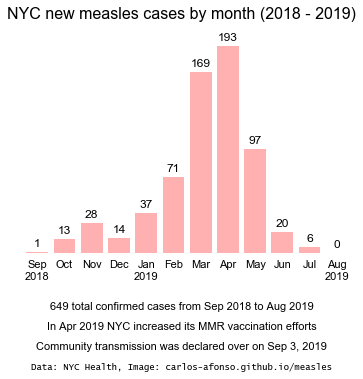

In [7]:
# Define font parameters
fn = 'Arial' # font name
fsb = 12     # font size base

# Create figure
fig = plt.figure()

# Add figure title
fig.suptitle('NYC new measles cases by month (2018 - 2019)', fontname=fn, fontsize=(fsb + 4))
#plt.title('NYC new measles cases by month', fontname=fn, fontsize=(fsb + 4))

# Create the horizontal bar chart
ax = data_to_plot.plot.bar(alpha=0.3, color='red', width=0.8)

# Remove the y-axis ticks and labels/values
#ax.get_yaxis().set_ticks([])
ax.set_yticks([])

# Remove the x-axis ticks
ax.xaxis.set_ticks_position('none')

# Set the x-axis labels
ax.set_xticklabels(month_labels, fontname=fn, fontsize=(fsb-1), rotation=0)

# Create the labels on top of the bars to explicitly show the
# number of new measles cases in each month
for i in ax.patches:
    ax.text(i.get_x() + 0.4, i.get_height() + 5, str(i.get_height()),
            fontname = fn, fontsize = fsb, horizontalalignment = 'center')

# Remove the axes box
plt.box(False)

# Add note about the total cases
text = str(total_cases) + ' total confirmed cases from ' + start_month + ' to ' + end_month
fig.text(0.5, -0.07, text, fontname = fn, fontsize = (fsb - 1), horizontalalignment='center')

# Add note about increased vaccination efforst
text = 'In Apr 2019 NYC increased its MMR vaccination efforts'
fig.text(0.5, -0.14, text, fontname = fn, fontsize = (fsb - 1), horizontalalignment = 'center')

# Add note about the end of the outbreak
text = 'Community transmission was declared over on Sep 3, 2019'
fig.text(0.5, -0.21, text, fontname = fn, fontsize = (fsb - 1), horizontalalignment = 'center')

# Add note about the Data and Image sources
text = 'Data: NYC Health, Image: carlos-afonso.github.io/measles'
fig.text(0.5, -0.28, text, fontname = 'Lucida Console', fontsize = (fsb - 3), horizontalalignment = 'center')

# Show figure
plt.show()

## Save bar chart

In [8]:
# Set image file path/name (without file extension)
img_file = os.path.join('..', 'images', 'nyc-new-measles-cases-by-month-bar-chart-py')

# Save as PNG image
fig.savefig(img_file + '.png', bbox_inches='tight', dpi=200)

# Save as SVG image
fig.savefig(img_file + '.svg', bbox_inches='tight')

## Export notebook as HTML

In [9]:
# Export this notebook as a static HTML page
os.system('jupyter nbconvert --to html nyc-new-measles-cases-by-month-final.ipynb')

0